# Linear Regression
This notebook analyses data related to the Italian COVID-19 trend. Data are released by the Italian Protezione Civile. For more details, please give a look at: https://towardsdatascience.com/italian-covid-19-analysis-with-python-1bdb0e64d5ac

## Getting Started
Firstly, we import data from the Github repository of the Italian Protezione Civile and then we calculate the Epidemics Progression Index (EPI). We extract columns `totale_casi`, which contains the total number of covid-19 infections since the epidemics began, and `tamponi`, which contains the total number of covid-19 swabs since the epidemics began. We store EPI in the `y` variable. Finally, we print all the list of dates for which we have data (`data['data']`).

In [67]:
import pandas as pd 

data = pd.read_csv("https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv") 
data.head()

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN


Then, we calculate the metrics to analyse: Epidemics Progresion Index (EPI). 

In [ ]:
tc = data['totale_casi']
tt = data['tamponi']
y = []
tt_increase = []
for i in range(1, len(tt)):
    current_epi = (tc[i] - tc[i-1])/(tt[i]-tt[i-1])*100
    tt_increase.append(tt[i]-tt[i-1])
    y.append(current_epi)

X = []
for i in range(1, len(y)+1):
    X.append([i])


We plot the EPI trends.

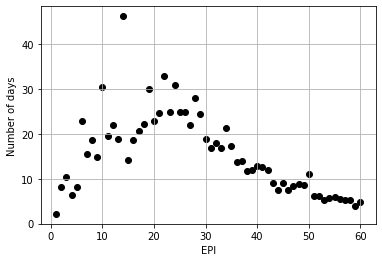

In [51]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


def my_plot(X,y):
    plt.scatter(X, y, color="black", linewidth=1)

    plt.grid()
    plt.xlabel('Number of days')
    plt.ylabel('EPI')
    plt.show()

my_plot(X,y)

We discover that, starting from day 30, EPI starts to decrease. Thus, we can consider only data from day 30.

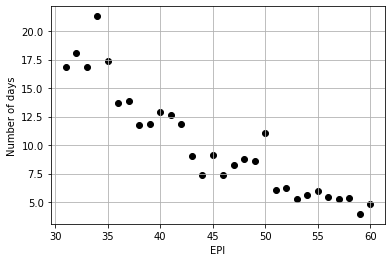

In [52]:
skip = 30
X = X[skip:]
y = y[skip:]

my_plot(X,y)

## Extract a sample
We extract a sample from `X` and `y`, i.e. `X_train` and `y_train`. We will test the model only on the sample.

In [53]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Model Definition
We can approximate data through a linear regression. In order to discover parameters (intercept, coefficient) related to the regression, we use the function `fit()` applied to the sample. 

In [54]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

32.83926882208768
[-0.49963276]


## Model Evaluation
We test the model on the remaining part of `X`, i.e. `X_test`. We use the function `predict()` to understand which value will predict the model on `X_test`. 

In [55]:
y_pred = regressor.predict(X_test)

We compare predicted values, with actual values.

In [59]:
df = pd.DataFrame({'Actual': np.array(y_test).flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,16.853330,16.351388
1,3.969516,3.360936
2,7.422601,10.855427
3,12.606245,12.354326
4,5.235391,4.360202
5,6.008914,5.359467


We calculate all the evaluation metrics. Please, give a look at: https://www.datavedas.com/model-evaluation-regression-models/ for more details.

We want the value of RMSE to be as low as possible, as lower the RMSE value is, the better the model is with its predictions.

Other methods to test the model can be found in this [interesting article](https://towardsdatascience.com/how-do-you-check-the-quality-of-your-regression-model-in-python-fa61759ff685).

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0533173922853838
Mean Squared Error: 2.2763028140482664
Root Mean Squared Error: 1.5087421297386332


## Extend the model to the whole population
The whole population is composed of `X` and `y`. Simply, plot results.

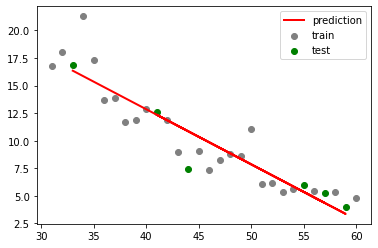

In [70]:
plt.scatter(X_train, y_train, color="gray", label='train')
plt.scatter(X_test, y_test,  color='green', label='test')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='prediction')
plt.legend()

plt.show()

## Future Trend Prediction
Predict the future trend for the next 20 days.

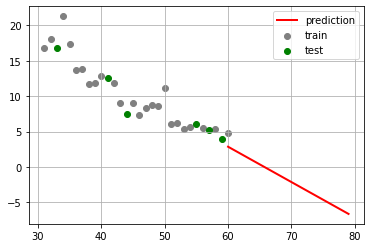

In [74]:
X_future = []
n_start = skip+len(X)
for i in range(n_start, n_start + 20):
    X_future.append([i])

y_future = regressor.predict(X_future)

plt.scatter(X_train, y_train, color="gray", label='train')
plt.scatter(X_test, y_test,  color='green', label='test')
plt.plot(X_future, y_future, color='red', linewidth=2, label='prediction')
plt.legend()
plt.grid()
plt.show()

Predict the zero value, i.e when the EPI will be 0.

Solve the system of equations: `y = 0` and `y = ax+b`. `x = -b/a`

In [77]:
x0 = - (regressor.intercept_/regressor.coef_)
x0

array([65.72681301])

Convert number of days to date. Data start from 2020 February 24. Then we have skipped 30 days.

In [81]:
from datetime import datetime
from datetime import timedelta  
data_eff = datetime.strptime(data['data'][skip], '%Y-%m-%dT%H:%M:%S')
data['data'][skip]

'2020-03-25T17:00:00'

In [82]:
def n_to_date(n):
    return data_eff + timedelta(days=n-skip)

n_to_date(int(x0))

datetime.datetime(2020, 4, 29, 17, 0)

In [85]:
def date_to_n(my_date):
    initial_date = datetime.strptime(data['data'][0], '%Y-%m-%dT%H:%M:%S')
    return (my_date - initial_date).days + 1

my_date = datetime.strptime("2020-04-25", '%Y-%m-%d')
n = date_to_n(my_date)
predict = regressor.predict([[n]])
predict[0]

2.3616706182024565